Column Details:
* **step:**	tells about the unit of time
* **type:**	type of transaction done
* **amount:**	the total amount of transaction
* **nameOrg:**	account that starts the transaction 
* **oldbalanceOrg:**	Balance of the account of sender before transaction
* **newbalanceOrg:**	Balance of the account of sender after transaction
* **nameDest:**	account that receives the transaction
* **oldbalanceDest:**	Balance of the account of receiver before transaction
* **newbalanceDest:**	Balance of the account of receiver after transaction
* **isFraud:**	The value to be predicted i.e. 0 or 1
* **isFlaggedFraud:** indicates whether the system flagged a transaction as potentially fraudulent

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [4]:
# download the dataset from kaggle and copy-paste the path.
df = pd.read_csv(r"F:\Self Learned Projects\32. Online Payment Fraud Detection Using ML\onlinefraud.csv")
df.shape

(6362620, 11)

### EDA1

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


* Object column "type" is very important so wee'll retain that and convert it into numerical column.
* Few object columns like "nameOrig" and "nameDest" are completely categorical and there is no point in converting it into numerical column so we'll be dropping them.

In [10]:
df.drop(columns = ['nameOrig','nameDest'], axis=1, inplace=True)       #dropped 2 columns i.e 'nameOrig','nameDest'

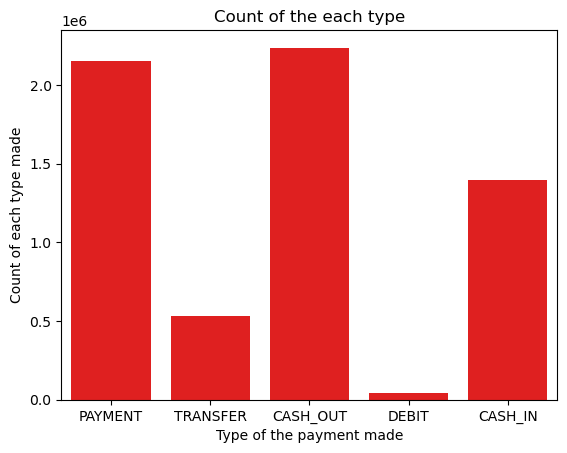

In [11]:
# Let's work with the "type"
sns.countplot(x = df['type'], color = 'red')
plt.xlabel("Type of the payment made")
plt.ylabel("Count of each type made")
plt.title("Count of the each type")
plt.show()

<Axes: xlabel='type', ylabel='amount'>

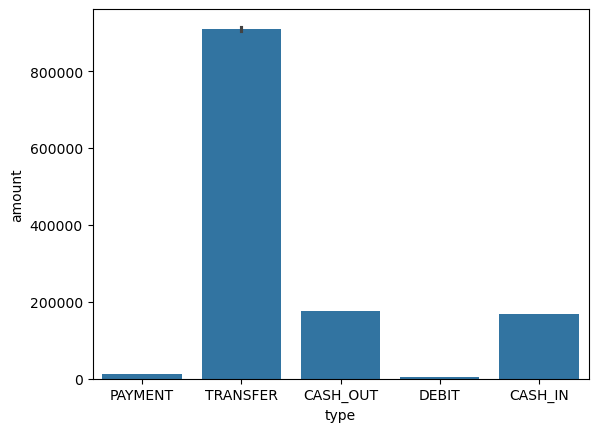

In [12]:
sns.barplot(x='type', y='amount', data=df)

* From both plots we observe that Payment and Cash_out are most used and Debit is the least.
* Although the amount of money transferred is most via TRANSFER this could imply few things like,
* The most amount of fraud is being done via Transfer, still we need to be more sure about this 

In [14]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

There's a large difference in the data points of each class so it may pose a significant threat to the model but we'll conclude that after observing the effeciency of the model.

In [16]:
df.groupby('isFraud')["type"].value_counts()

isFraud  type    
0        CASH_OUT    2233384
         PAYMENT     2151495
         CASH_IN     1399284
         TRANSFER     528812
         DEBIT         41432
1        CASH_OUT       4116
         TRANSFER       4097
Name: count, dtype: int64

Our above assumption that most of the fraud transactions were done via TRANSFER was a bit off rather the CASH_OUT and relatively closely TRANSFER contribute towards the fraudulent transfer of money.

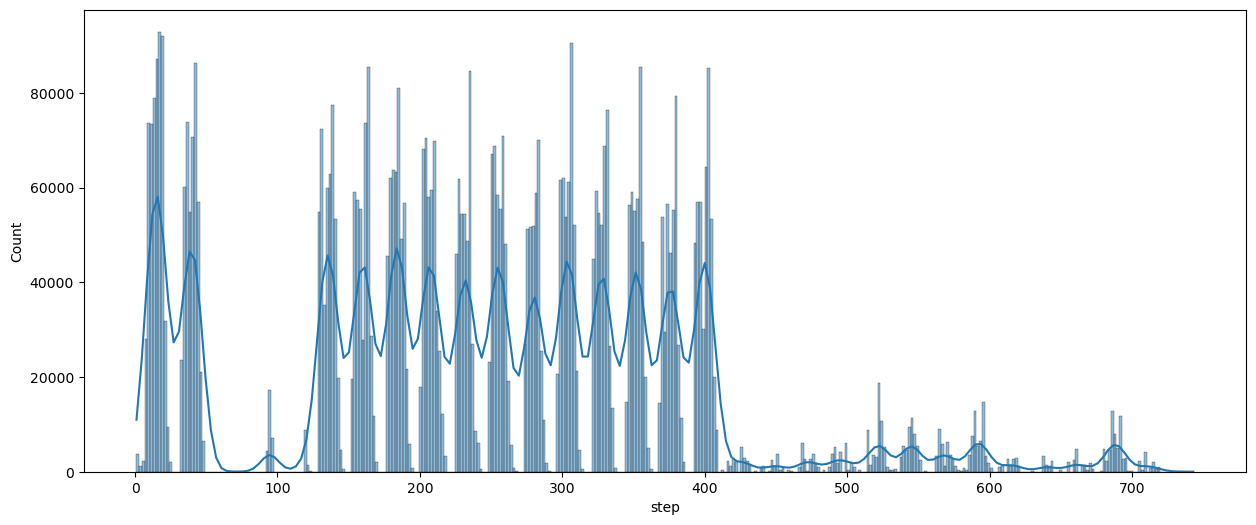

In [18]:
plt.figure(figsize = (15, 6))
sns.histplot(df['step'], kde=True)
plt.show()

We can see that the most of the data is distributed from 200 to 400.

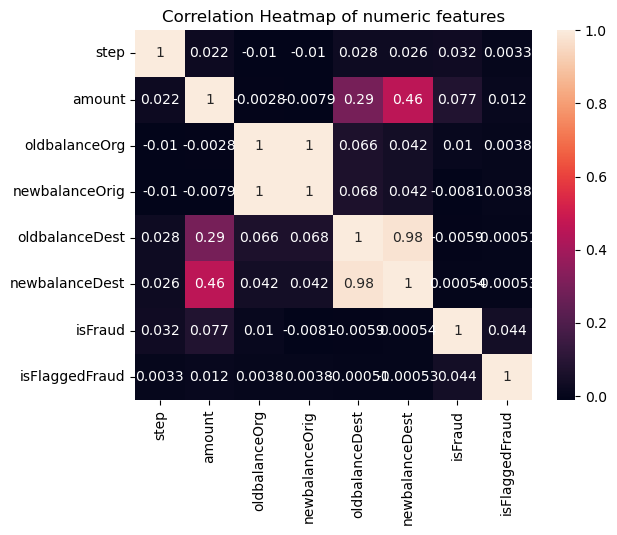

In [20]:
plt.title("Correlation Heatmap of numeric features")
sns.heatmap(df.corr(numeric_only=True), annot=True, cbar=True)
plt.show()

oldbalanceOrg ans newbalanceOrg are supposed to be closely related because of the change in transfer amount similarly even oldbalanceDest and newbalanceDest.

### Data Preprocessing


In [23]:
# converting "type" into numerical column using label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [24]:
df.type.unique()

array([3, 4, 1, 2, 0])

we can see that type column is converted into numerical column

In [26]:
# Feature extraction for training the model
x = df.drop(['isFraud'], axis=1)
y = df['isFraud']
x.shape, y.shape

((6362620, 8), (6362620,))

### EDA2

In [28]:
#splitting the dataset for training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4453834, 8), (1908786, 8), (4453834,), (1908786,))

In [29]:
#Model building

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score as ras

models = [LogisticRegression(),
          XGBClassifier(),
          RandomForestClassifier(n_estimators = 7, criterion='entropy', random_state = 7)]

for model in models:
    model.fit(x_train, y_train)
    print(f'{model.__class__.__name__}')
    print("Training Accuracy : ", ras(y_train, model.predict(x_train)))
    print("Testing Accuracy : ", ras(y_test, model.predict(x_test)))

C:\Users\peros\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
Training Accuracy :  0.6796490528883458
Testing Accuracy :  0.6783623143828377
XGBClassifier
Training Accuracy :  0.9548198925609125
Testing Accuracy :  0.9254368333265336
RandomForestClassifier
Training Accuracy :  0.9853746632091125
Testing Accuracy :  0.8934149949268734


* From above scores we can say XGBClassifier is performing the best so let's plot the confusion matrix for the same.
* Random Forest Classifier is pruned to overfitting because it is performing really good in trainig data but not so well in unseen data.

C:\Users\peros\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


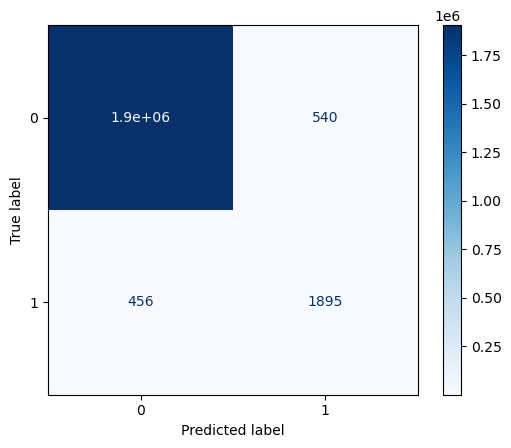

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model[1].predict(x_test)
c = confusion_matrix(y_pred, y_test)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Thank you so mcuh for going through my work till the end, feel free to get in touch if you have any questions... :)